In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bank_Churn_Dataset.csv')
print(df.shape)
df.sample(10)

(10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
4885,15654408,562,Spain,Male,41,5,165445.04,2,1,0,85787.31,0
1623,15804516,589,France,Male,38,2,0.00,1,1,0,79915.28,0
9834,15799358,516,France,Female,46,6,62212.29,1,0,1,171681.86,1
4251,15720847,601,France,Male,35,2,0.00,2,1,1,118983.18,0
5236,15645184,701,France,Male,29,2,0.00,2,1,0,176943.59,0
8631,15753462,632,Germany,Male,30,2,72549.00,2,0,1,182728.80,0
6716,15805676,515,Spain,Male,29,4,151012.55,2,1,0,9770.97,0
4611,15710553,555,Germany,Male,48,3,142055.41,2,0,1,79134.78,0
4488,15776128,716,France,Female,44,6,155114.90,1,0,0,133871.83,0
5403,15733169,590,Spain,Male,22,7,125265.61,1,1,1,161253.08,0


In [3]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [4]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
df.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


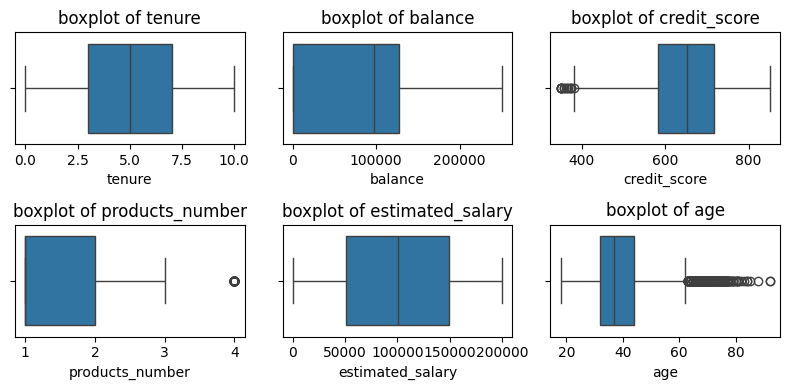

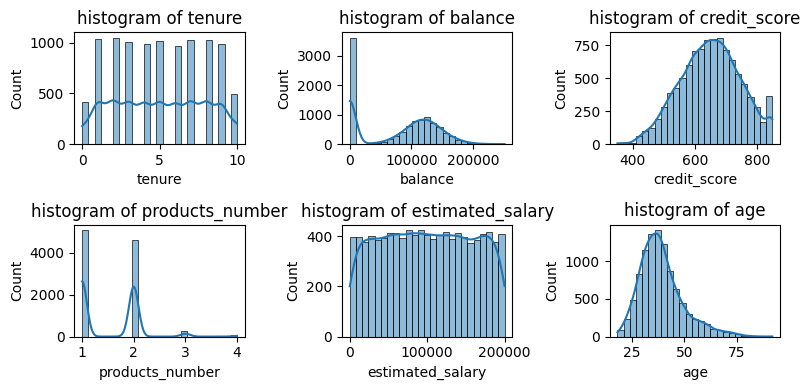

In [6]:
col_numeric = ['tenure','balance','credit_score','products_number','estimated_salary','age']
plt.figure(figsize=(8, 4))
for i, col in enumerate(col_numeric,1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'boxplot of {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
for i, col in enumerate(col_numeric,1):
    plt.subplot(2,3, i)
    sns.histplot(df[col], kde=True , bins=25)
    plt.title(f'histogram of {col}')

plt.tight_layout()
plt.show()

In [11]:
col_numeric = ['tenure','balance','credit_score','products_number','estimated_salary','age','churn']
corr_mat = df[col_numeric].corr()
pd.DataFrame(corr_mat['churn']).sort_values(by = 'churn' , ascending = False)

,churn
churn,1.000000
age,0.285323
balance,0.118533
estimated_salary,0.012097
tenure,-0.014001
credit_score,-0.027094
products_number,-0.047820


### Distribuation of Target Variable

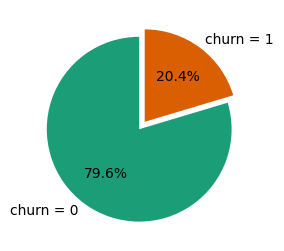

,churn,count,pct
0,0,7963,79.63
1,1,2037,20.37


In [116]:
churn_count = df['churn'].value_counts().reset_index()
churn_count['pct'] = churn_count['count']/churn_count['count'].sum() * 100

color = sns.color_palette('Dark2',2)
plt.figure(figsize=(3,3))
plt.pie(x = churn_count['pct'] , labels=['churn = 0','churn = 1'] , autopct='%0.1f%%', startangle=90, colors=color, explode=[0.05,0.05])
plt.show()

churn_count

In [117]:
df_churn_0 = df[df['churn']==0]
df_churn_1 = df[df['churn']==1]

### Customer Churn by Tenure

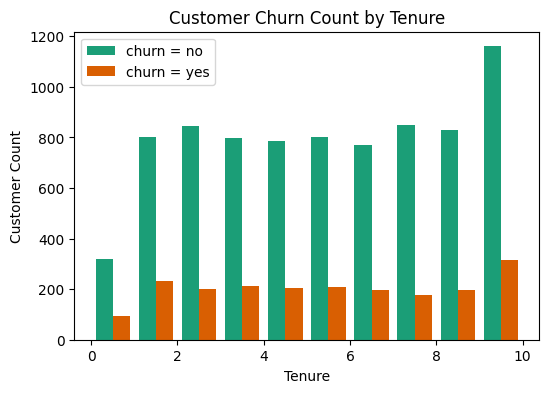

In [118]:
plt.figure(figsize=(6,4))
color = sns.color_palette('Dark2',2)
plt.hist(x = [df_churn_0['tenure'],df_churn_1['tenure']],color=color,label=['churn = no','churn = yes'])
plt.legend()
plt.xlabel("Tenure")
plt.ylabel("Customer Count")
plt.title("Customer Churn Count by Tenure")
plt.show()

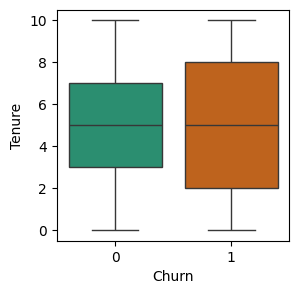

In [119]:
plt.figure(figsize=(3,3))
color = sns.color_palette('Dark2',2)
sns.boxplot(x = 'churn' , y = 'tenure', hue = 'churn' , data = df , palette=color , legend=False)
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

### Customer Churn by Balance

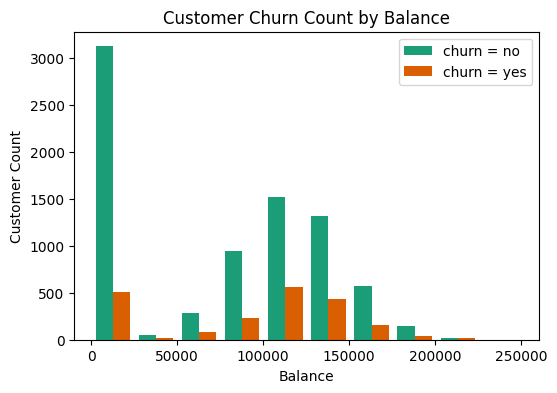

In [120]:
plt.figure(figsize=(6,4))
color = sns.color_palette('Dark2',2)
plt.hist(x = [df_churn_0['balance'],df_churn_1['balance']],color=color,label=['churn = no','churn = yes'])
plt.legend()
plt.xlabel("Balance")
plt.ylabel("Customer Count")
plt.title("Customer Churn Count by Balance")
plt.show()

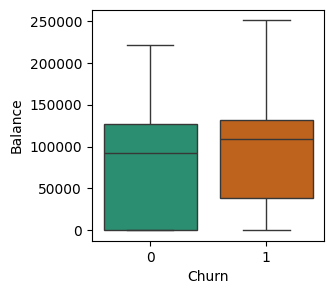

In [121]:
plt.figure(figsize=(3,3))
color = sns.color_palette('Dark2',2)
sns.boxplot(x = 'churn' , y = 'balance', hue = 'churn' , data = df , palette=color , legend=False)
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.show()

### Customer Churn by Credit Score

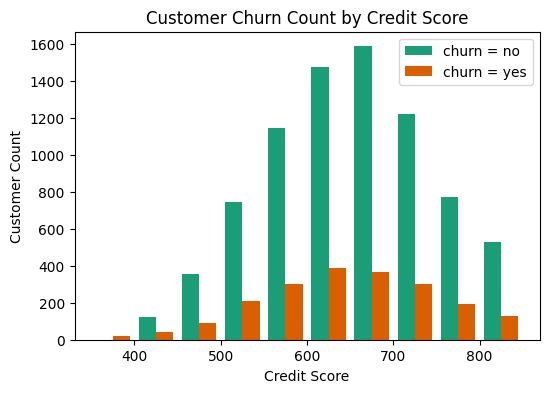

In [122]:
plt.figure(figsize=(6,4))
color = sns.color_palette('Dark2',2)
plt.hist(x = [df_churn_0['credit_score'],df_churn_1['credit_score']],color=color,label=['churn = no','churn = yes'])
plt.legend()
plt.xlabel("Credit Score")
plt.ylabel("Customer Count")
plt.title("Customer Churn Count by Credit Score")
plt.show()

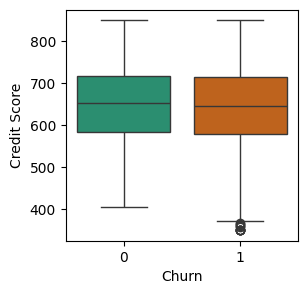

In [123]:
plt.figure(figsize=(3,3))
color = sns.color_palette('Dark2',2)
sns.boxplot(x = 'churn' , y = 'credit_score', hue = 'churn' , data = df , palette=color , legend=False)
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()

### Customer Churn by Products Number

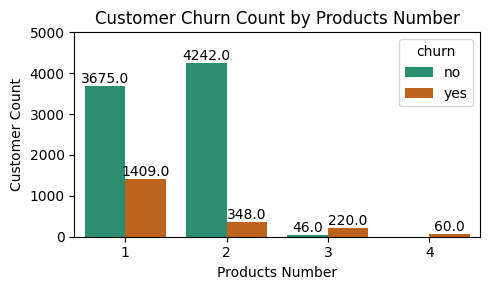

In [125]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df, x='products_number', hue='churn', palette="Dark2")
plt.xlabel("Products Number")
plt.ylabel("Customer Count")
plt.title("Customer Churn Count by Products Number")

ax.legend(title='churn', labels=['no', 'yes'])
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f')
plt.ylim(0,5000)
plt.tight_layout()
plt.show()

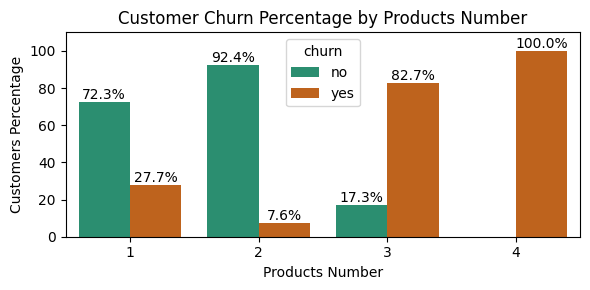

In [126]:
total_counts = df['products_number'].value_counts()
churn_counts_0 = (df_churn_0['products_number'].value_counts() / total_counts * 100).reset_index(name='pct')  
churn_counts_1 = (df_churn_1['products_number'].value_counts() / total_counts * 100).reset_index(name='pct')

churn_counts_0['churn'] = 'no'
churn_counts_1['churn'] = 'yes'
churn_data = pd.concat([churn_counts_0, churn_counts_1]).reset_index()
churn_data.fillna(0)

plt.figure(figsize=(6, 3))
ax = sns.barplot(data=churn_data, x='products_number', y='pct', hue='churn', palette="Dark2")
plt.xlabel("Products Number")
plt.ylabel("Customers Percentage")
plt.title("Customer Churn Percentage by Products Number")
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%')
plt.ylim(0, 110)
plt.show()

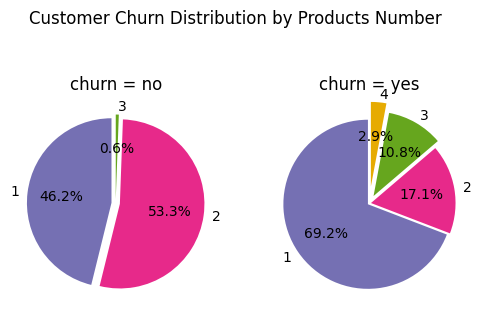

In [134]:
product_gr_0 = df_churn_0.groupby('products_number').size().reset_index(name='count')
product_gr_0['percentage'] = (product_gr_0['count'] / product_gr_0['count'].sum()) * 100

product_gr_1 = df_churn_1.groupby('products_number').size().reset_index(name='count')
product_gr_1['percentage'] = (product_gr_1['count'] / product_gr_1['count'].sum()) * 100

colors = sns.color_palette('Dark2')[2:6]
plt.figure(figsize=(6,4))
plt.suptitle('Customer Churn Distribution by Products Number')
plt.subplot(1,2,1)
plt.pie(product_gr_0['percentage'], labels=product_gr_0['products_number'], autopct='%1.1f%%',startangle=90, colors=colors, explode = [0.05] * len(product_gr_0))
plt.title('churn = no')
plt.subplot(1,2,2)
plt.pie(product_gr_1['percentage'], labels=product_gr_1['products_number'], autopct='%1.1f%%',startangle=90, colors=colors, explode = [0.02, 0.02, 0.1 ,0.2])
plt.title('churn = yes')
plt.show()


### Customer Churn by Salary

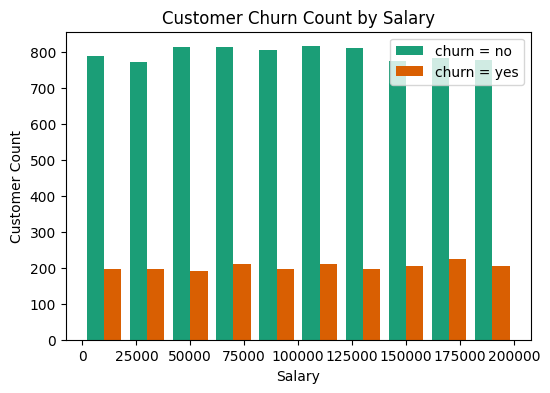

In [127]:
plt.figure(figsize=(6,4))
color = sns.color_palette('Dark2',2)
plt.hist(x = [df_churn_0['estimated_salary'],df_churn_1['estimated_salary']],color=color,label=['churn = no','churn = yes'])
plt.legend()
plt.xlabel("Salary")
plt.ylabel("Customer Count")
plt.title("Customer Churn Count by Salary")
plt.show()

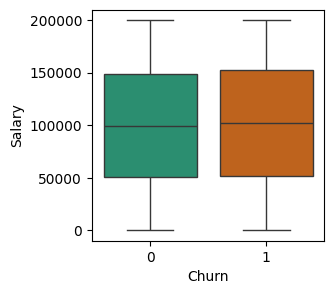

In [128]:
plt.figure(figsize=(3,3))
color = sns.color_palette('Dark2',2)
sns.boxplot(x = 'churn' , y = 'estimated_salary', hue = 'churn' , data = df , palette=color , legend=False)
plt.xlabel('Churn')
plt.ylabel('Salary')
plt.show()

### Customer Churn by Activity Status

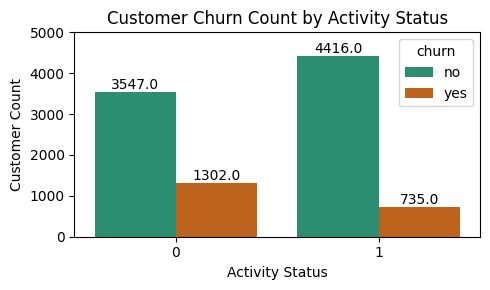

In [129]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df, x='active_member', hue='churn', palette="Dark2")
plt.xlabel("Activity Status")
plt.ylabel("Customer Count")
plt.title("Customer Churn Count by Activity Status")

ax.legend(title='churn', labels=['no', 'yes'])
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f')
plt.ylim(0,5000)
plt.tight_layout()
plt.show()

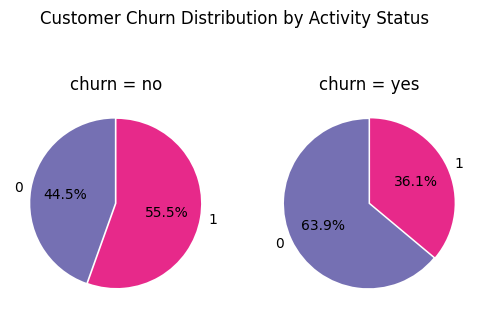

In [131]:
activity_gr_0 = df_churn_0.groupby('active_member').size().reset_index(name='count')
activity_gr_0['pct'] = (activity_gr_0['count'] / activity_gr_0['count'].sum()) * 100

activity_gr_1 = df_churn_1.groupby('active_member').size().reset_index(name='count')
activity_gr_1['pct'] = (activity_gr_1['count'] / activity_gr_1['count'].sum()) * 100

colors = sns.color_palette('Dark2')[2:4]
plt.figure(figsize=(6,4))
plt.suptitle('Customer Churn Distribution by Activity Status')
plt.subplot(1,2,1)
plt.pie(activity_gr_0['pct'], labels=activity_gr_0['active_member'], autopct='%1.1f%%',startangle=90, colors=colors, explode = [0.01] * len(activity_gr_0))
plt.title('churn = no')
plt.subplot(1,2,2)
plt.pie(activity_gr_1['pct'], labels=activity_gr_1['active_member'], autopct='%1.1f%%',startangle=90, colors=colors, explode = [0.01] * len(activity_gr_1))
plt.title('churn = yes')
plt.show()

### Customer Churn by Credit Card Status

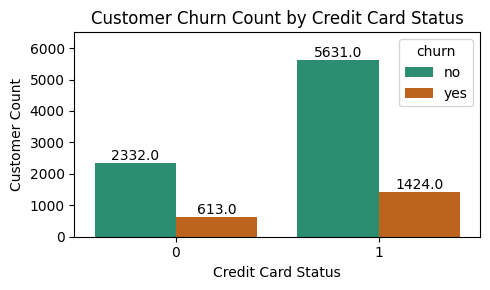

In [90]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df, x='credit_card', hue='churn', palette="Dark2")
plt.xlabel("Credit Card Status")
plt.ylabel("Customer Count")
plt.title("Customer Churn Count by Credit Card Status")

ax.legend(title='churn', labels=['no', 'yes'])
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f')
plt.ylim(0,6500)
plt.tight_layout()
plt.show()

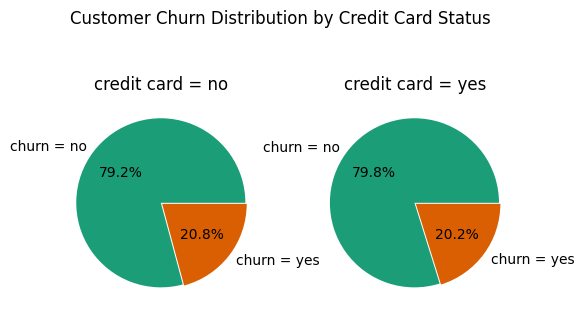

In [99]:
cr_gr_0 = df[df['credit_card']==0].groupby('churn').size().reset_index(name='count')
cr_gr_0['pct'] = (cr_gr_0['count'] / cr_gr_0['count'].sum()) * 100

cr_gr_1 = df[df['credit_card']==1].groupby('churn').size().reset_index(name='count')
cr_gr_1['pct'] = (cr_gr_1['count'] / cr_gr_1['count'].sum()) * 100

colors = sns.color_palette('Dark2', 2)
plt.figure(figsize=(6,4))
plt.suptitle('Customer Churn Distribution by Credit Card Status')
plt.subplot(1,2,1)
plt.pie(cr_gr_0['pct'], labels=['churn = no' , 'churn = yes'], autopct='%1.1f%%',startangle=0, colors=colors, explode = [0.01] * len(cr_gr_0))
plt.title('credit card = no')
plt.subplot(1,2,2)
plt.pie(cr_gr_1['pct'], labels=['churn = no' , 'churn = yes'], autopct='%1.1f%%',startangle=0, colors=colors, explode = [0.01] * len(cr_gr_1))
plt.title('credit card = yes')
plt.show()

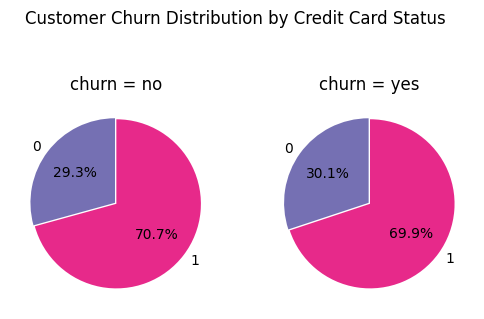

In [108]:
cr_gr_0 = df_churn_0.groupby('credit_card').size().reset_index(name='count')
cr_gr_0['pct'] = (cr_gr_0['count'] / cr_gr_0['count'].sum()) * 100

cr_gr_1 = df_churn_1.groupby('credit_card').size().reset_index(name='count')
cr_gr_1['pct'] = (cr_gr_1['count'] / cr_gr_1['count'].sum()) * 100

colors = sns.color_palette('Dark2')[2:4]
plt.figure(figsize=(6,4))
plt.suptitle('Customer Churn Distribution by Credit Card Status')
plt.subplot(1,2,1)
plt.pie(cr_gr_0['pct'], labels=cr_gr_0['credit_card'], autopct='%1.1f%%',startangle=90, colors=colors, explode = [0.01] * len(cr_gr_0))
plt.title('churn = no')
plt.subplot(1,2,2)
plt.pie(cr_gr_1['pct'], labels=cr_gr_1['credit_card'], autopct='%1.1f%%',startangle=90, colors=colors, explode = [0.01] * len(cr_gr_1))
plt.title('churn = yes')
plt.show()

### Customer Churn by Age

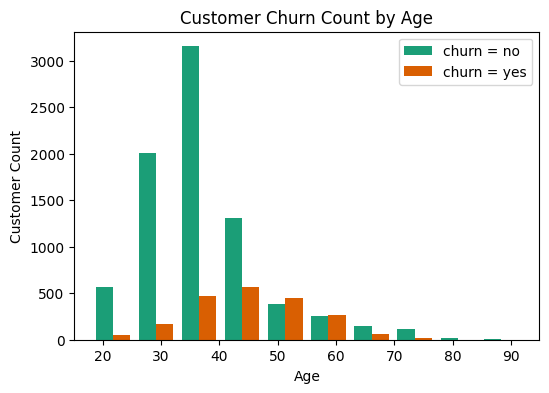

In [52]:
plt.figure(figsize=(6,4))
color = sns.color_palette('Dark2',2)
plt.hist(x = [df_churn_0['age'],df_churn_1['age']],color=color,label=['churn = no','churn = yes'])
plt.legend()
plt.xlabel("Age")
plt.ylabel("Customer Count")
plt.title("Customer Churn Count by Age")
plt.show()

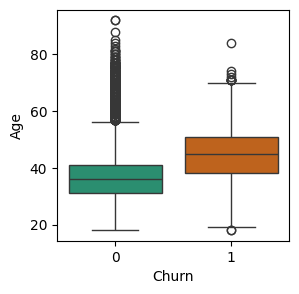

In [53]:
plt.figure(figsize=(3,3))
color = sns.color_palette('Dark2',2)
sns.boxplot(x = 'churn' , y = 'age', hue = 'churn' , data = df , palette=color , legend=False)
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

### Customer Churn by Gender

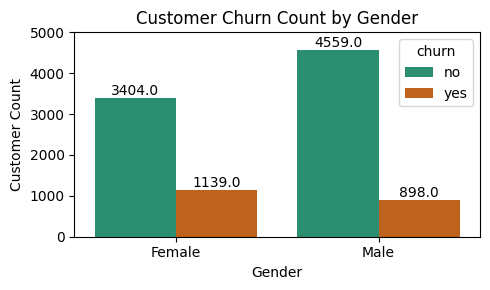

In [55]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df, x='gender', hue='churn', palette="Dark2")
plt.xlabel("Gender")
plt.ylabel("Customer Count")
plt.title("Customer Churn Count by Gender")

ax.legend(title='churn', labels=['no', 'yes'])
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f')
plt.ylim(0,5000)
plt.tight_layout()
plt.show()

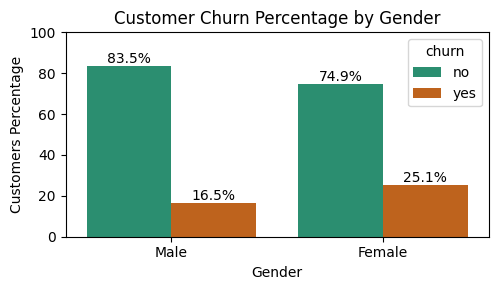

In [56]:
total_counts = df['gender'].value_counts()
churn_counts_0 = (df_churn_0['gender'].value_counts() / total_counts * 100).reset_index(name='pct')  
churn_counts_1 = (df_churn_1['gender'].value_counts() / total_counts * 100).reset_index(name='pct')

churn_counts_0['churn'] = 'no'
churn_counts_1['churn'] = 'yes'
churn_data = pd.concat([churn_counts_0, churn_counts_1])

plt.figure(figsize=(5, 3))
ax = sns.barplot(data=churn_data, x='gender', y='pct', hue='churn', palette="Dark2")
plt.xlabel("Gender")
plt.ylabel("Customers Percentage")
plt.title("Customer Churn Percentage by Gender")
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%')
plt.ylim(0, 100)
plt.show()

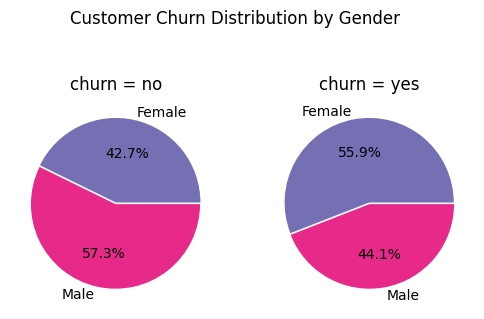

In [132]:
gender_gr_0 = df_churn_0.groupby('gender').size().reset_index(name='count')
gender_gr_0['percentage'] = (gender_gr_0['count'] / gender_gr_0['count'].sum()) * 100

gender_gr_1 = df_churn_1.groupby('gender').size().reset_index(name='count')
gender_gr_1['percentage'] = (gender_gr_1['count'] / gender_gr_1['count'].sum()) * 100

colors = sns.color_palette('Dark2')[2:4]
plt.figure(figsize=(6,4))
plt.suptitle('Customer Churn Distribution by Gender')
plt.subplot(1,2,1)
plt.pie(gender_gr_0['percentage'], labels=gender_gr_0['gender'], autopct='%1.1f%%',startangle=0, colors=colors, explode = [0.01] * len(gender_gr_0))
plt.title('churn = no')
plt.subplot(1,2,2)
plt.pie(gender_gr_1['percentage'], labels=gender_gr_1['gender'], autopct='%1.1f%%',startangle=0, colors=colors, explode = [0.01] * len(gender_gr_1))
plt.title('churn = yes')
plt.show()

### Customer Churn by Country

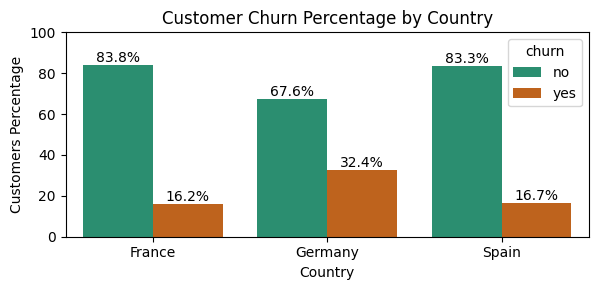

In [58]:
total_counts = df['country'].value_counts()
churn_counts_0 = (df_churn_0['country'].value_counts() / total_counts * 100).reset_index(name='pct')  
churn_counts_1 = (df_churn_1['country'].value_counts() / total_counts * 100).reset_index(name='pct')

churn_counts_0['churn'] = 'no'
churn_counts_1['churn'] = 'yes'
churn_data = pd.concat([churn_counts_0, churn_counts_1])

plt.figure(figsize=(6, 3))
ax = sns.barplot(data=churn_data, x='country', y='pct', hue='churn', palette="Dark2")
plt.xlabel("Country")
plt.ylabel("Customers Percentage")
plt.title("Customer Churn Percentage by Country")
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%')
plt.ylim(0, 100)
plt.show()

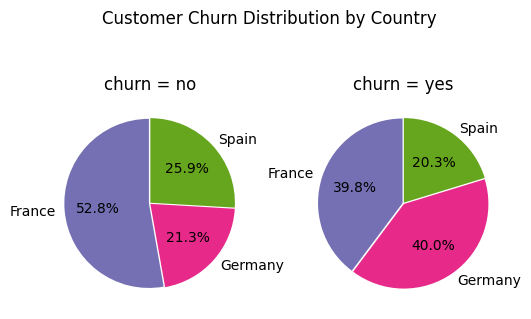

In [133]:
country_gr_0 = df_churn_0.groupby('country').size().reset_index(name='count')
country_gr_0['percentage'] = (country_gr_0['count'] / country_gr_0['count'].sum()) * 100

country_gr_1 = df_churn_1.groupby('country').size().reset_index(name='count')
country_gr_1['percentage'] = (country_gr_1['count'] / country_gr_1['count'].sum()) * 100

colors = sns.color_palette('Dark2')[2:5]
plt.figure(figsize=(6,4))
plt.suptitle('Customer Churn Distribution by Country')
plt.subplot(1,2,1)
plt.pie(country_gr_0['percentage'], labels=country_gr_0['country'], autopct='%1.1f%%',startangle=90, colors=colors, explode = [0.01] * len(country_gr_0))
plt.title('churn = no')
plt.subplot(1,2,2)
plt.pie(country_gr_1['percentage'], labels=country_gr_1['country'], autopct='%1.1f%%',startangle=90, colors=colors, explode = [0.01] * len(country_gr_1))
plt.title('churn = yes')
plt.show()